In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data =  pd.read_csv("melb_data.csv")
data.head()


In [ ]:
#Check number of unique values

# loop through each column in the dataset
for column in data.columns:
    # calculate the number of unique values in the column
    unique_values = data[column].nunique()
    # print the column name and number of unique values
    print(f"{column}: {unique_values}")


Variables that have more than 25 unique values will be counted as numeric values

# 2. Variables in dataset

The format goes like this:

VariableName: variable types

Variable description

Rooms: Categorical Qualitative, Ordinal, Discrete

Number of rooms

Price: Numeric, Ratio, Continuous

Price in dollars

Method: Categorical, Nominal, Discrete

S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: Categorical, Nominal, Discrete

br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Categorical, Nominal, Discrete (This is to check whether there is any relationship with agents and price sold, better agents have better price)

Real Estate Agent by their names

Date: 
Date sold

Distance: Numeric, Ratio, Continuous

Distance from CBD

Regionname: Categorical, Nominal, Discrete

General Region (West, North West, North, North east …etc)

Propertycount: Numeric, Interval, Continuous

Number of properties that exist in the suburb.

Bedroom2 : Categorical, Ordinal, Discrete

Scraped # of Bedrooms (from different source)

Bathroom: Categorical, Ordinal, Discrete

Number of Bathrooms

Car: Categorical, Ordinal, Discrete

Number of carspots

Landsize: Numeric, Interval, Continuous

Land Size

BuildingArea: Numeric, Interval, Continuous

Building Size

CouncilArea: Categorical, Nominal, Discrete

Governing council for the area

In [ ]:
#remove redundant and irrelevant attributes:
#Address has 13378 unique values, almost unique for each object. Description rather than category, also overlaps with latitude, longitude, regionname
#method simply describes if property was put on auction or sold
data['Address'].value_counts()

In [ ]:
#remove redundant and irrelevant attributes:
#postcode is redundant
data['Postcode'].value_counts()

In [ ]:
sb.boxplot(x="Method", y="Price", data = data)

In [ ]:
#remove redundant and irrelevant attributes:
#method simply describes how the data is obtained (sold, auction), is irrelevant
data = data.drop(columns=['Address','Method','Postcode'])

In [ ]:
#data cleaning: checking for duplicates
data.duplicated().sum()

In [ ]:
#data cleaning: missing values
data.isna().sum()
#missing values for car can be removed as very few, buildingarea, yearbuilt, councilarea needs replacement

In [ ]:
#data cleaning: missing values
data = data.dropna(subset=['Car'])
data.reset_index(drop=True, inplace=True)
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median())
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())
data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])

In [ ]:
#data transformation: yearbuilt to age
data['BuildingAge'] = 2018-data['YearBuilt']
data = data.drop(columns=['YearBuilt'])

In [ ]:
#encoding categorical attributes
#suburb is nominal, has high cardinality with 314 categories - hashing used
categorical = ['Suburb','Type','SellerG','CouncilArea','Regionname']
for x in categorical:
    print(data[x].value_counts())

In [ ]:
#encoding categorical attributes
#suburb
from sklearn.feature_extraction import FeatureHasher
hasher = FeatureHasher(n_features=14, input_type='string')
suburb_encoded = hasher.transform(data['Suburb'])
columns = []
for x in range(0, 14):
    columns.append('Suburb'+str(x))
suburb_encoded = pd.DataFrame(suburb_encoded.toarray(), columns=columns)
#type
data['Type'].value_counts()


In [ ]:
#data transformation: standardization as data contains many outliers
data.boxplot()
plt.yscale("log")
plt.xticks(rotation=90)

In [ ]:
#as data contains many outliers, standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = data.copy()
numeric_columns = ['Rooms','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','BuildingAge','Lattitude','Longtitude','Propertycount']
data_scaled[numeric_columns] = scaler.fit_transform(data_scaled[numeric_columns])

# 3. Exploratory Analysis

In [121]:
df = pd.read_csv("melb_data.csv")
df.head()


Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   
3           NaN        NaN       Yarra   -37.7969    144.9969   
4         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [122]:
# Box-plot helper function, x is categorical, y is numeric variable
def boxplot_helper(x, y, fig_width, fig_height):
    # create a larger figure
    plt.figure(figsize=(fig_width, fig_height))
    # create a boxplot of a categorical variable against a numeric variable
    sb.boxplot(x=x, y=y, data=df, palette='rainbow')
    # add a title to the plot
    plt.title('Boxplot of {} by {}'.format(y, x))
    # show the plot
    plt.show()


In [123]:
# Box-plot helper function, x is categorical, y is numeric variable
def scatterplot_helper(x, y, fig_width, fig_height):
    # create a larger figure
    plt.figure(figsize=(fig_width, fig_height))

    # Create the scatter plot
    sb.scatterplot(x=x, y=y, data = df)


    # Add labels and a title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Boxplot of {} by {}'.format(y, x))
    
    # show the plot
    plt.show()


In [157]:
def KDEplot_helper(x, fig_width, fig_height):
    # create a larger figure
    plt.figure(figsize=(fig_width, fig_height))

    # Create the scatter plot
    sb.kdeplot(x=x, data=df)

    # Add labels and a title
    plt.xlabel(x)
    plt.title('Boxplot of {} '.format(x))

    # show the plot
    plt.show()


In [150]:
def histogram_helper(x, fig_width, fig_height):
    # create a larger figure
    plt.figure(figsize=(fig_width, fig_height))

    # Create the scatter plot
    sb.histplot(data=data, x = x)

    # Add labels and a title
    plt.xlabel(x)
    plt.ylabel('Frequency')
    plt.title('Boxplot of {} by {}'.format("Frequency", x))

    # show the plot
    plt.show()


In [124]:
mean = df['Price'].mean()
SD = df['Price'].std()
outlierHead = mean - 3*SD
outlierTail = mean + 3*SD
df.drop(df[(df.Price < outlierHead) | (
    df.Price > outlierTail)].index, inplace=True)
df.describe()


Rooms         Price      Distance      Postcode      Bedroom2  \
count  13348.000000  1.334800e+04  13348.000000  13348.000000  13348.000000   
mean       2.916692  1.029080e+06     10.183496   3104.807237      2.894591   
std        0.944372  5.247472e+05      5.894988     91.224632      0.956329   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.450000e+05      6.200000   3044.000000      2.000000   
50%        3.000000  9.000000e+05      9.300000   3084.000000      3.000000   
75%        3.000000  1.305000e+06     13.000000   3148.000000      3.000000   
max       10.000000  2.990000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13348.000000  13286.000000   13348.000000   6986.000000  8053.000000   
mean       1.511387      1.595364     554.593722    148.930661  1965.034025   
std        0.661775      0.950909    4024.822644    545.899308    37.010392   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     173.000000     92.000000  1945.000000   
50%        1.000000      2.000000     430.000000    125.000000  1970.000000   
75%        2.000000      2.000000     650.000000    170.000000  1999.000000   
max        8.000000     10.000000  433014.000000  44515.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  13348.000000  13348.000000   13348.000000  
mean     -37.808600    144.994604    7450.260339  
std        0.079623      0.104557    4395.583571  
min      -38.182550    144.431810     249.000000  
25%      -37.856600    144.927960    4380.000000  
50%      -37.801130    144.999400    6543.000000  
75%      -37.755200    145.058193   10331.000000  
max      -37.408530    145.526350   21650.000000

In [125]:
boxplot_helper("SellerG", "Price", 500, 200)

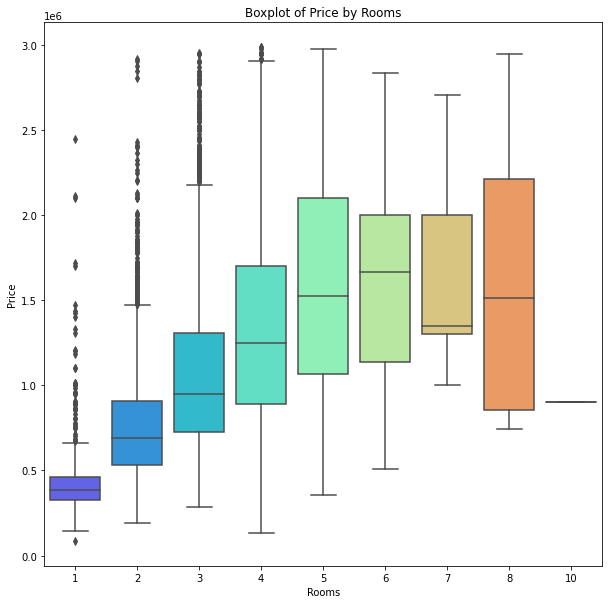

In [126]:
boxplot_helper("Rooms", "Price", 10, 10)

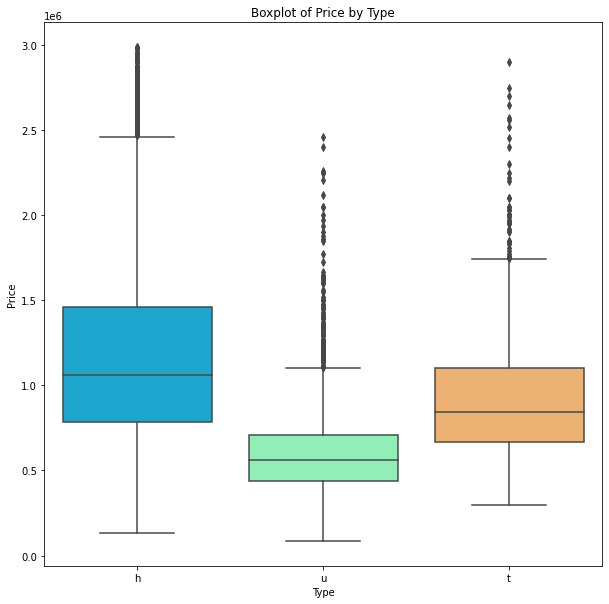

In [127]:
boxplot_helper("Type", "Price", 10, 10)


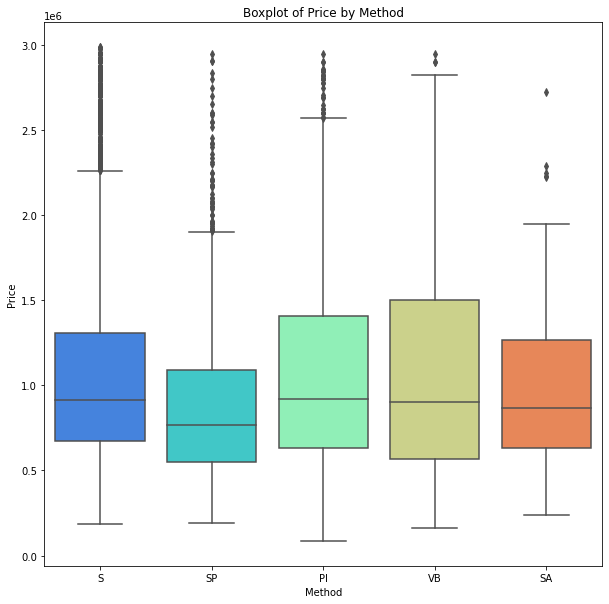

In [128]:
boxplot_helper("Method", "Price", 10, 10)

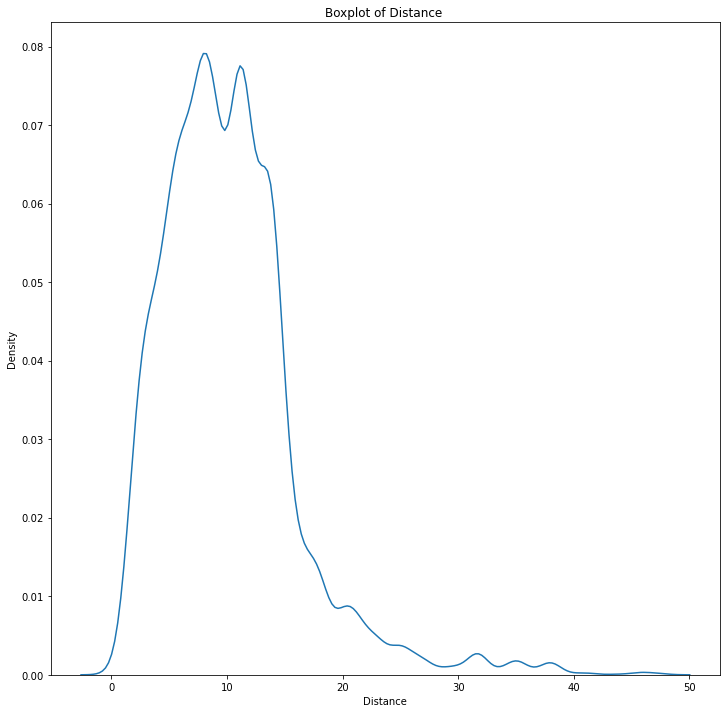

In [163]:
KDEplot_helper("Distance", 12, 12)


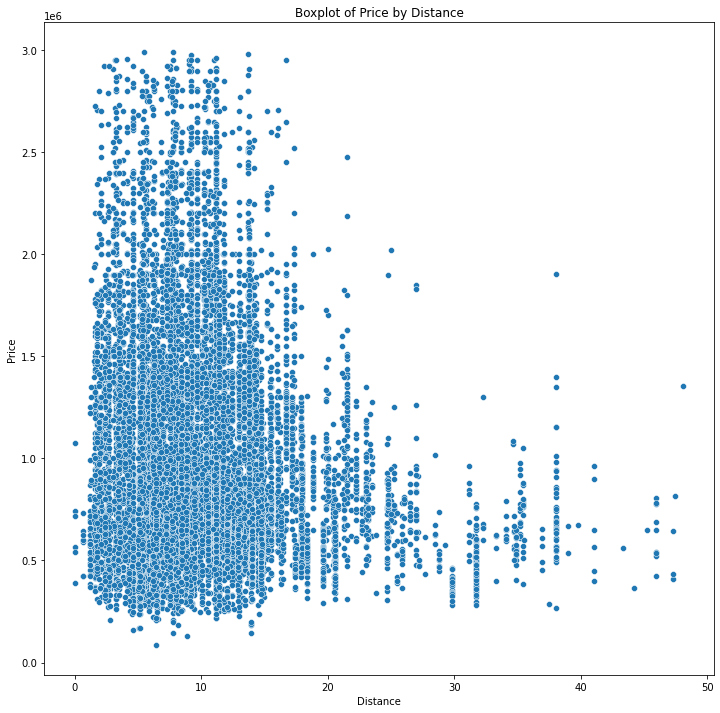

In [129]:

scatterplot_helper("Distance", "Price", 12, 12)

In [130]:
boxplot_helper("Postcode", "Price", 500, 200)

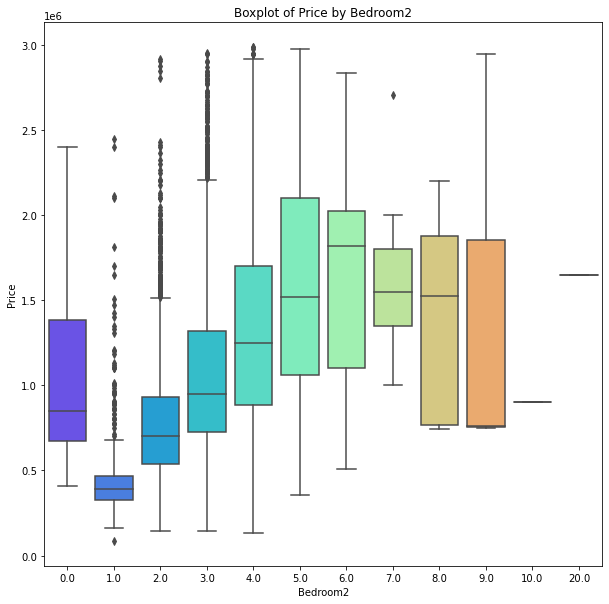

In [131]:
boxplot_helper("Bedroom2", "Price", 10, 10)


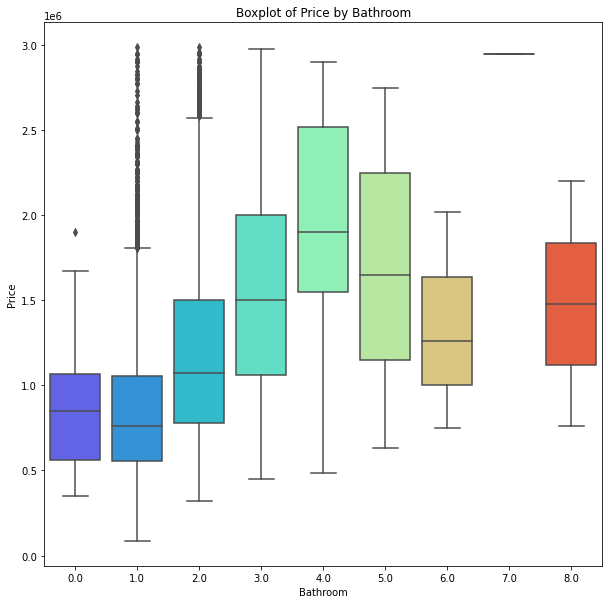

In [132]:
boxplot_helper("Bathroom", "Price", 10, 10)

The number of empty rows in "my_column" is: 62


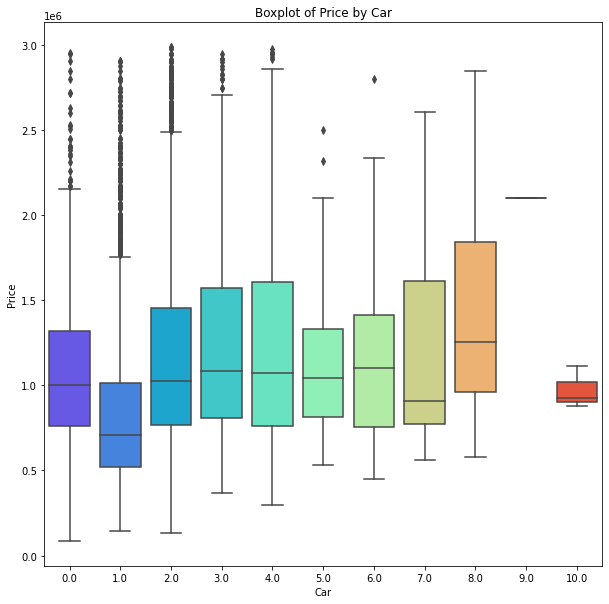

In [133]:
# check for empty rows in a specific column
empty_rows = df['Car'].isnull().sum()

# print the number of empty rows
print(f'The number of empty rows in "my_column" is: {empty_rows}')

# drop empty rows 
df = df.dropna(subset=['Car'])

boxplot_helper("Car", "Price", 10, 10)

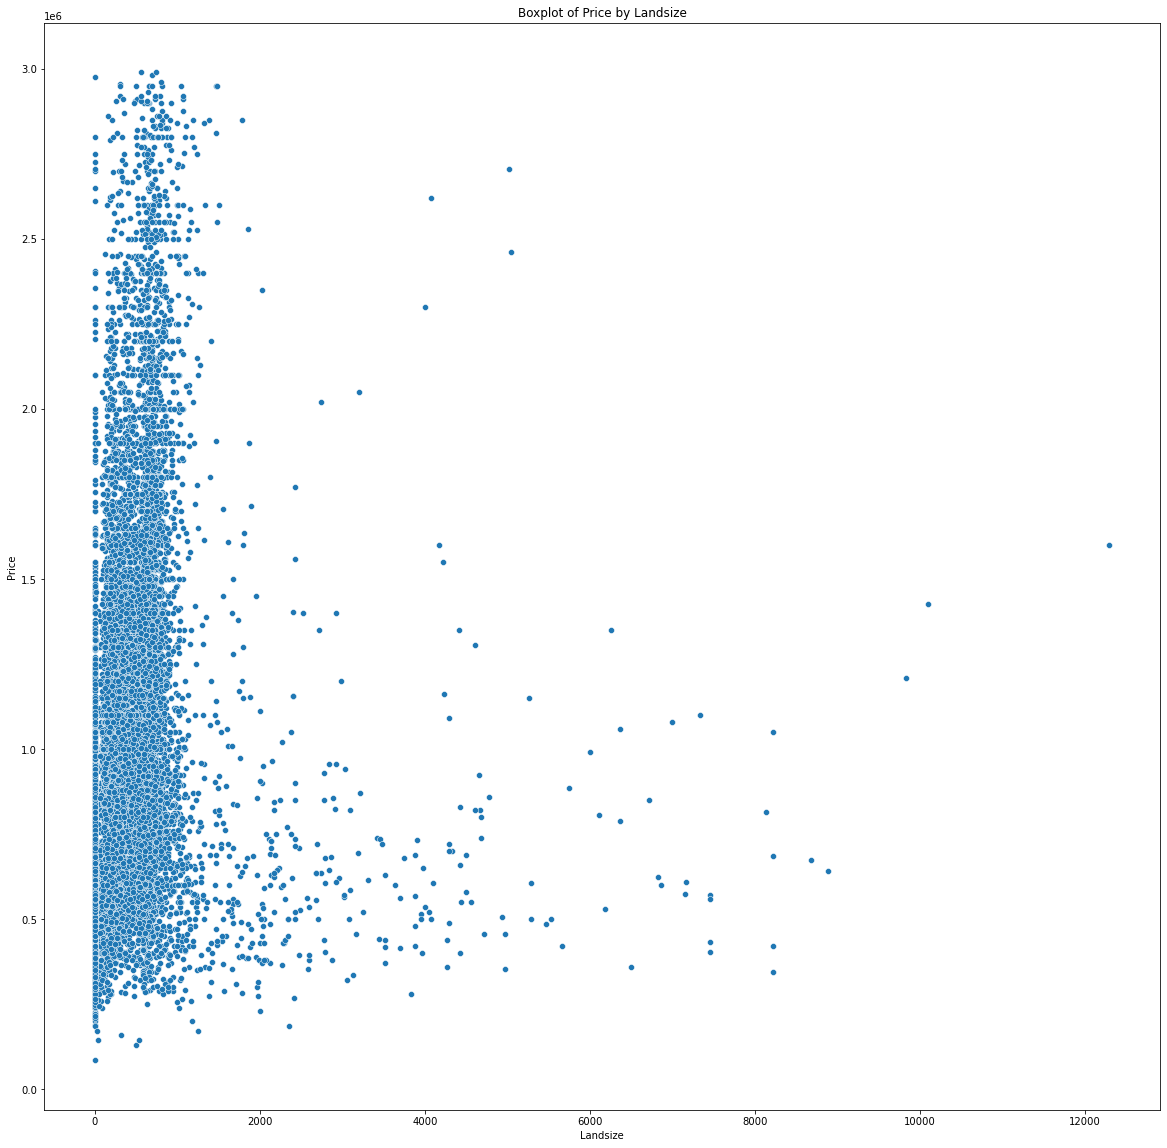

In [134]:
mean = df['Landsize'].mean()
SD = df['Landsize'].std()
outlierHead = mean - 3*SD
outlierTail = mean + 3*SD
df.drop(df[(df.Landsize < outlierHead) | (
    df.Landsize > outlierTail)].index, inplace=True)
df.describe()

scatterplot_helper("Landsize", "Price", 20, 20)


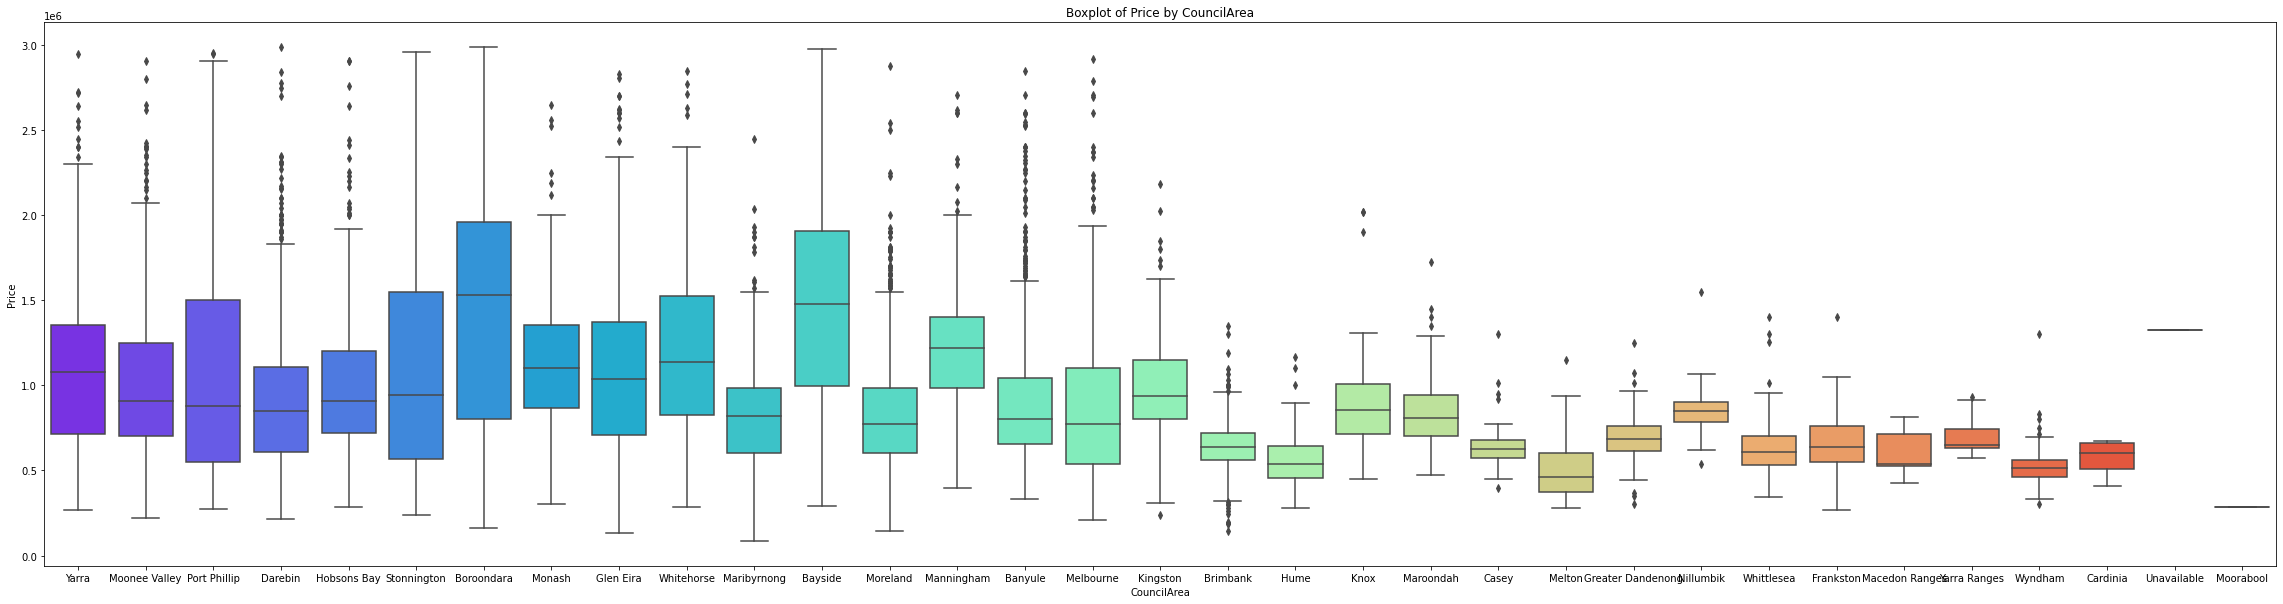

In [135]:
boxplot_helper("CouncilArea", "Price", 40, 10)

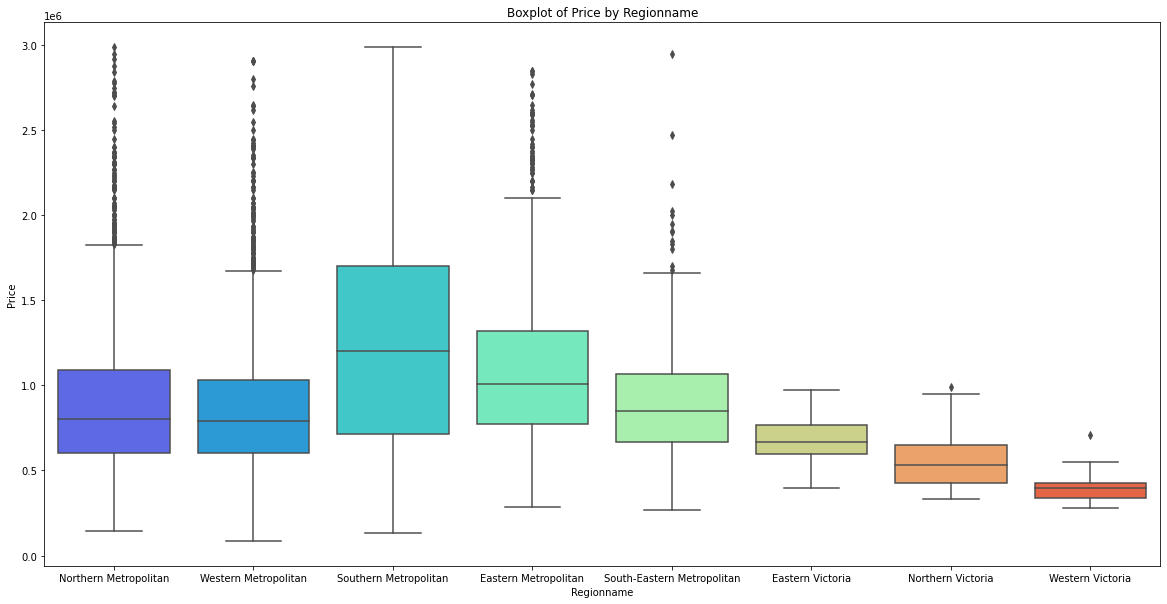

In [136]:
boxplot_helper("Regionname", "Price", 20, 10)


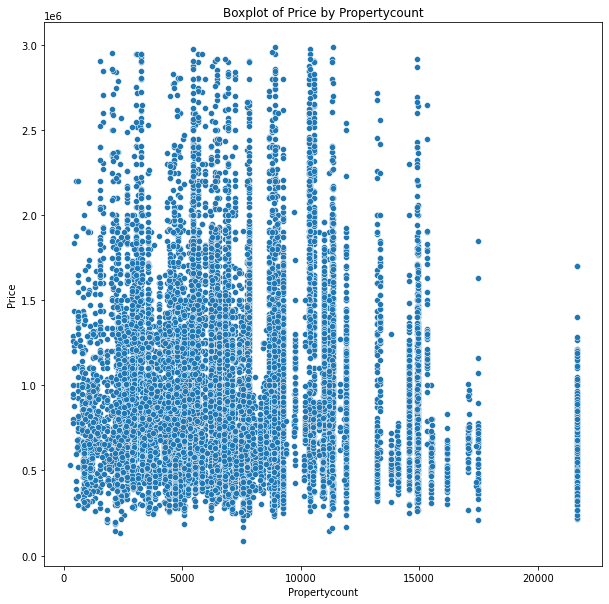

In [137]:
scatterplot_helper("Propertycount", "Price", 10, 10)
